In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate
from scipy.special import legendre

In [2]:
def fx(x):
    """function to approximate"""
    return np.exp(2*x + np.sin(4 * x))

### projection on Legendre polynomials

In [3]:
def fhat(f, k):
    """scaling of kth order legendre polynomial given f"""
    return 1/L2norm(legendre(k))**2 * inner_prod(f,legendre(k),w=1)

def L2norm(u,w=1):
    """L2 norm of a polynomial / function"""
    return np.sqrt(inner_prod(u,u,w=1))

def inner_prod(u,v,w=1):
    """inner product (u,v) given weight function w"""
    return integrate.quad(integrand_inner,-1,1,args=(u,v,w))[0]

def integrand_inner(x, u, v, w=1):
    """calculates integrand for inner_prod (u,v) given weight function w"""
    if type(w) == int or type(w) == float:
        return u(x)*v(x)*w
    else:
        return u(x)*v(x)*w(x)

def proj_f(f,n):
    """projects f on legendre polynomials up to degree n"""
    proj = np.poly1d(np.zeros(n+1))
    for i in range(n+1):
        proj += fhat(fx,i) * legendre(i)
    return proj

def approx_error(f, proj):
    """calculates the approximation error of the projection proj with respect to the function f"""
    return np.sqrt(integrate.quad(integrand_error,-1,1,args=(f, proj)))[0]

def integrand_error(x, f, proj):
    """calculates integrand for approx_error"""
    return np.abs(f(x)-proj(x))**2

In [4]:
proj = proj_f(fx,5)
approx_error(fx,proj)

0.6455883893903108

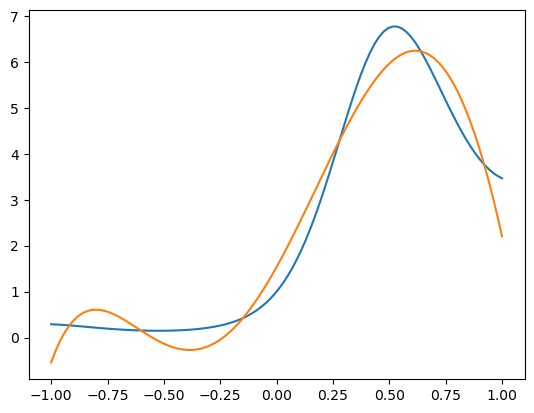

In [5]:
x = np.linspace(-1,1,100)
plt.plot(x, fx(x))
plt.plot(x,proj(x))

In [6]:
err_proj = []
n=30
for i in range(n+1):
    proj = proj_f(fx,i)
    err_proj.append(approx_error(fx,proj))

Text(0, 0.5, 'approximation error')

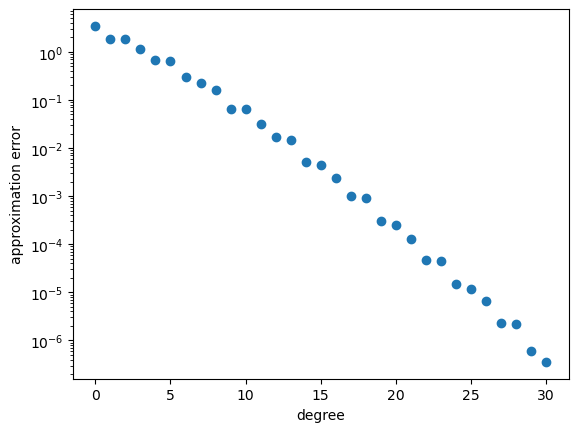

In [7]:
plt.scatter(np.linspace(0,n,n+1),err_proj)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('approximation error')

### Interpolation

In [8]:
n_points = 5
samples_x = np.linspace(-1,1,n_points)
samples_y = fx(samples_x)

In [9]:
bary_int = interpolate.BarycentricInterpolator(samples_x, samples_y)
approx_error(fx,bary_int.__call__)

1.4791539547647048

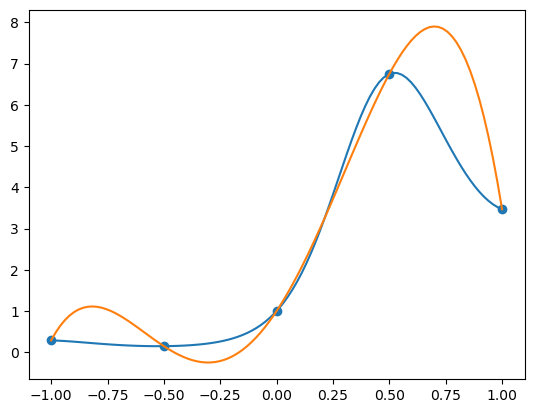

In [10]:
plt.plot(x, fx(x))
plt.scatter(samples_x, samples_y)
plt.plot(x, (bary_int.__call__(x)))

In [11]:
err_int = []
n=30
for i in range(2,n+2):
    samples_x = np.linspace(-1,1,i)
    samples_y = fx(samples_x)
    inter = interpolate.BarycentricInterpolator(samples_x, samples_y)
    err_int.append(approx_error(fx,inter))

Text(0, 0.5, 'approximation error')

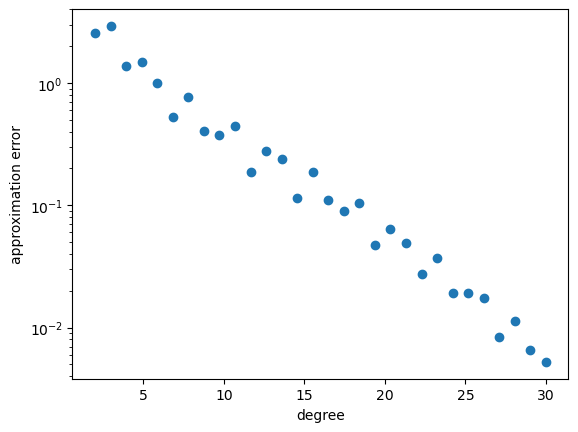

In [12]:
plt.scatter(np.linspace(2,n,n),err_int)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('approximation error')

### Comparison

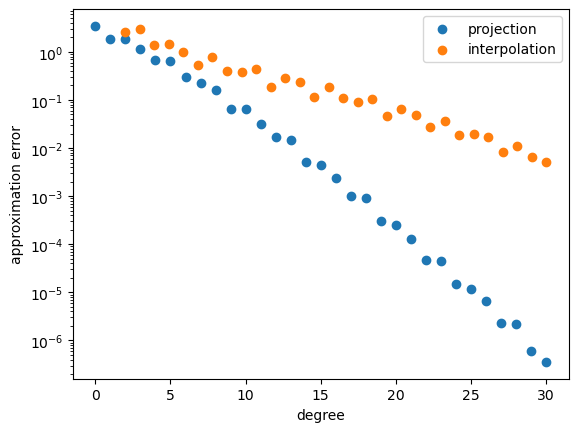

In [13]:
plt.scatter(np.linspace(0,n,n+1),err_proj, label = 'projection')
plt.scatter(np.linspace(2,n,n),err_int, label = 'interpolation')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('approximation error')
plt.legend()